# **Imports**

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Get the uploaded file name dynamically
filename = list(uploaded.keys())[0]  # This grabs the first (and only) file uploaded

# Read the uploaded CSV file into a Pandas DataFrame
umpire = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first few rows of the dataset
print(umpire.head())

Saving mlb-umpire-scorecard.csv to mlb-umpire-scorecard.csv
   id        date           umpire home away  home_team_runs  away_team_runs  \
0   1  2022-11-05  Lance Barksdale  HOU  PHI               4               1   
1   2  2022-11-03     Jordan Baker  PHI  HOU               2               3   
2   3  2022-11-02     Tripp Gibson  PHI  HOU               0               5   
3   4  2022-11-01     Dan Iassogna  PHI  HOU               7               0   
4   5  2022-10-29       Pat Hoberg  HOU  PHI               5               2   

  pitches_called incorrect_calls expected_incorrect_calls correct_calls  \
0            124               4                       10           120   
1            149               6                      7.4           143   
2            124               7                      7.1           117   
3            140               5                        6           135   
4            129               0                      8.7           129   

  expect

# **Preprocessing**

In [ ]:
umpire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18213 entries, 0 to 18212
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            18213 non-null  int64 
 1   date                          18213 non-null  object
 2   umpire                        18213 non-null  object
 3   home                          18213 non-null  object
 4   away                          18213 non-null  object
 5   home_team_runs                18213 non-null  int64 
 6   away_team_runs                18213 non-null  int64 
 7   pitches_called                18213 non-null  object
 8   incorrect_calls               18213 non-null  object
 9   expected_incorrect_calls      18213 non-null  object
 10  correct_calls                 18213 non-null  object
 11  expected_correct_calls        18213 non-null  object
 12  correct_calls_above_expected  18213 non-null  object
 13  accuracy        

In [ ]:
# Convert columns to numeric
for col in umpire.columns[5:]:
    umpire[col] = pd.to_numeric(umpire[col], errors='coerce')

In [ ]:
umpire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18213 entries, 0 to 18212
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            18213 non-null  int64  
 1   date                          18213 non-null  object 
 2   umpire                        18213 non-null  object 
 3   home                          18213 non-null  object 
 4   away                          18213 non-null  object 
 5   home_team_runs                18213 non-null  int64  
 6   away_team_runs                18213 non-null  int64  
 7   pitches_called                18093 non-null  float64
 8   incorrect_calls               18093 non-null  float64
 9   expected_incorrect_calls      18093 non-null  float64
 10  correct_calls                 18093 non-null  float64
 11  expected_correct_calls        18093 non-null  float64
 12  correct_calls_above_expected  18093 non-null  float64
 13  a

In [ ]:
# Check for missing values
umpire.isnull().sum()

,0
id,0
date,0
umpire,0
home,0
away,0
home_team_runs,0
away_team_runs,0
pitches_called,120
incorrect_calls,120
expected_incorrect_calls,120


In [ ]:
# Remove the rows containing missing values
umpire.dropna(inplace=True)

In [ ]:
umpire.isnull().sum()

,0
id,0
date,0
umpire,0
home,0
away,0
home_team_runs,0
away_team_runs,0
pitches_called,0
incorrect_calls,0
expected_incorrect_calls,0


# **Methodology**

## **Supervised Learning**

### Regression

In [ ]:
import statsmodels.formula.api as sm

# Fit the linear regression model
model = sm.ols("favor_home ~ incorrect_calls", data=umpire).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             favor_home   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.781
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.182
Time:                        21:02:07   Log-Likelihood:                -17520.
No. Observations:               18093   AIC:                         3.504e+04
Df Residuals:                   18091   BIC:                         3.506e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0186      0.013     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = umpire[['incorrect_calls']]
y = umpire['favor_home']

# Split data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Refit the model using only the training data
model = sm.ols("favor_home ~ incorrect_calls", data=pd.concat([X_train, y_train], axis=1)).fit()

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 4.613132045250268e-07
Mean Squared Error: 0.42796695177436883


In [ ]:
# Fit the linear regression model
model = sm.ols("favor_home ~ accuracy + consistency + incorrect_calls + expected_incorrect_calls + accuracy_above_expected", data=umpire).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             favor_home   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.143
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.335
Time:                        21:02:52   Log-Likelihood:                -17518.
No. Observations:               18093   AIC:                         3.505e+04
Df Residuals:                   18087   BIC:                         3.509e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
# Define features (X) and target (y)
X = umpire[['accuracy', 'consistency', 'incorrect_calls', 'expected_incorrect_calls', 'accuracy_above_expected']]
y = umpire['favor_home']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Refit the model using only the training data
model = sm.ols("favor_home ~ accuracy + consistency + incorrect_calls + expected_incorrect_calls + accuracy_above_expected", data=pd.concat([X_train, y_train], axis=1)).fit()

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: -0.00012449809273351597
Mean Squared Error: 0.42802043029509396


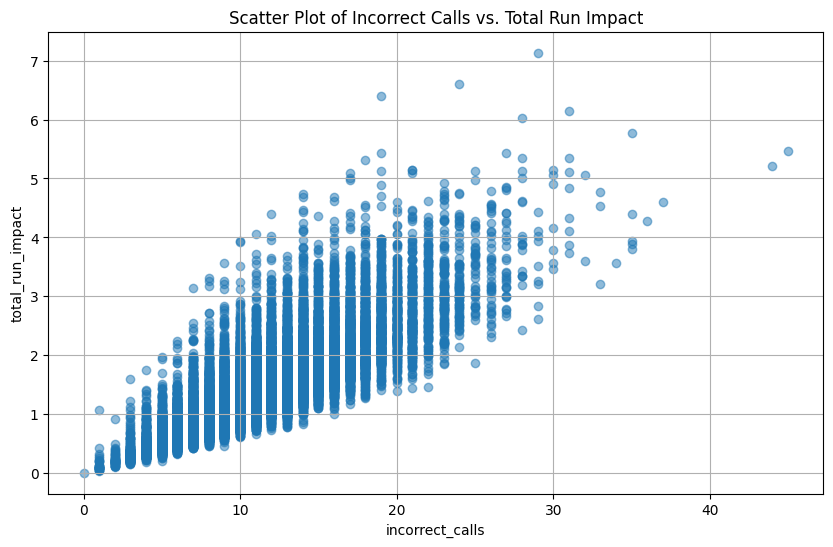

In [ ]:
import matplotlib.pyplot as plt

# Scatterplot of 'incorrect_calls' vs. 'total_run_impact'
plt.figure(figsize=(10, 6))
plt.scatter(umpire['incorrect_calls'], umpire['total_run_impact'], alpha=0.5)
plt.xlabel('incorrect_calls')
plt.ylabel('total_run_impact')
plt.title('Scatter Plot of Incorrect Calls vs. Total Run Impact')
plt.grid(True)
plt.show()

In [ ]:
# Fit the linear regression model
model = sm.ols('total_run_impact ~ incorrect_calls', data=umpire).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_run_impact   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                 3.441e+04
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                -11386.
No. Observations:               18093   AIC:                         2.278e+04
Df Residuals:                   18091   BIC:                         2.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0510      0.009     

In [ ]:
# Validation set approach for simple linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = umpire[['incorrect_calls']]
y = umpire['total_run_impact']

# Split data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f'R-squared on Validation Set (Simple): {r2}')
print(f'Mean Squared Error on Validation Set (Simple): {mse}')

R-squared on Validation Set (Simple): 0.6592788131034484
Mean Squared Error on Validation Set (Simple): 0.20729338086597374


In [ ]:
# Add 'below_expected' column to the DataFrame
umpire['below_expected'] = umpire['correct_calls_above_expected'].apply(lambda x: 1 if x < 0 else 0)

In [ ]:
# Run a multiple linear regression

# Fit the linear regression model
model = sm.ols('total_run_impact ~ accuracy + incorrect_calls', data=umpire).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_run_impact   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                 1.846e+04
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:04:19   Log-Likelihood:                -10964.
No. Observations:               18093   AIC:                         2.193e+04
Df Residuals:                   18090   BIC:                         2.196e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.1884      0.277    -

In [ ]:
# Validation set approach for multiple linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = umpire[['incorrect_calls', 'accuracy']]
y = umpire['total_run_impact']

# Split data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f'R-squared on Validation Set (Multiple): {r2}')
print(f'Mean Squared Error on Validation Set (Multiple): {mse}')

R-squared on Validation Set (Multiple): 0.6721802226611603
Mean Squared Error on Validation Set (Multiple): 0.19944421589471334


In [ ]:
# K-Fold Cross-Validation for simple linear regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = umpire[['incorrect_calls']]
y = umpire['total_run_impact']

# Create a linear regression model
lr_model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print('Simple Linear Regression:')
print('Cross-validation scores (negative MSE):', cv_scores)
print('Average cross-validation score (negative MSE):', cv_scores.mean())

# Convert negative MSE scores to positive RMSE
rmse_scores = (-cv_scores)**0.5
print('RMSE scores:', rmse_scores)
print('Average RMSE:', rmse_scores.mean())

Simple Linear Regression:
Cross-validation scores (negative MSE): [-0.17860499 -0.19089846 -0.19132132 -0.23318285 -0.24257466]
Average cross-validation score (negative MSE): -0.207316456920197
RMSE scores: [0.42261684 0.43691928 0.43740292 0.48289011 0.49251869]
Average RMSE: 0.454469568242471


In [ ]:
# Fit the linear regression model
model = sm.ols('total_run_impact ~ incorrect_calls + accuracy + incorrect_calls * below_expected', data=umpire).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_run_impact   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     9241.
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:04:27   Log-Likelihood:                -10956.
No. Observations:               18093   AIC:                         2.192e+04
Df Residuals:                   18088   BIC:                         2.196e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
# K-Fold Cross-Validation for multiple linear regression

# Define features (X) and target (y)
X = umpire[['incorrect_calls', 'accuracy', 'below_expected']]
y = umpire['total_run_impact']

# Create a linear regression model
lr_model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print('Multiple Linear Regression:')
print('Cross-validation scores (negative MSE):', cv_scores)
print('Average cross-validation score (negative MSE):', cv_scores.mean())

# Convert negative MSE scores to positive RMSE
rmse_scores = (-cv_scores)**0.5
print('RMSE scores:', rmse_scores)
print('Average RMSE:', rmse_scores.mean())

Multiple Linear Regression:
Cross-validation scores (negative MSE): [-0.17012396 -0.18300924 -0.18437719 -0.22019352 -0.22851762]
Average cross-validation score (negative MSE): -0.19724430454646763
RMSE scores: [0.41246086 0.42779579 0.42939165 0.46924782 0.47803517]
Average RMSE: 0.443386256706229


In [ ]:
# Group by umpire and home, then calculate the average incorrect_calls
grouped_umpire = umpire.groupby(['umpire', 'home'])[['incorrect_calls', 'total_run_impact']].mean().reset_index()
grouped_umpire

,umpire,home,incorrect_calls,total_run_impact
0,Adam Beck,ARI,6.000000,0.450000
1,Adam Beck,ATL,8.285714,1.364286
2,Adam Beck,BAL,8.000000,0.815000
3,Adam Beck,BOS,6.500000,0.750000
4,Adam Beck,CHC,11.000000,1.150000
...,...,...,...,...
3316,Will Little,STL,8.636364,1.180909
3317,Will Little,TB,8.000000,0.960000
3318,Will Little,TEX,8.500000,0.993750
3319,Will Little,TOR,8.800000,1.048000


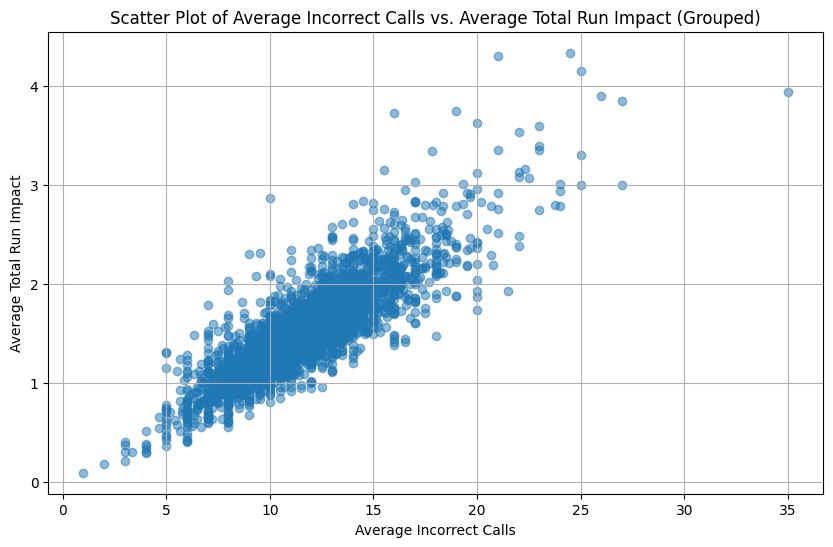

In [ ]:
# Scatterplot of 'incorrect_calls' vs. 'total_run_impact' after grouping
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(grouped_umpire['incorrect_calls'], grouped_umpire['total_run_impact'], alpha=0.5)
plt.xlabel('Average Incorrect Calls')
plt.ylabel('Average Total Run Impact')
plt.title('Scatter Plot of Average Incorrect Calls vs. Average Total Run Impact (Grouped)')
plt.grid(True)
plt.show()

In [ ]:
# Fit the linear regression model
model = sm.ols('total_run_impact ~ incorrect_calls', data=grouped_umpire).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_run_impact   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     8672.
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:04:50   Log-Likelihood:                 56.452
No. Observations:                3321   AIC:                            -108.9
Df Residuals:                    3319   BIC:                            -96.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0100      0.017     

In [ ]:
# K-Fold Cross-Validation for simple linear regression after grouping

# Define features (X) and target (y)
X = grouped_umpire[['incorrect_calls']]
y = grouped_umpire['total_run_impact']

# Create a linear regression model
lr_model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print('Simple Linear Regression (Grouped):')
print('Cross-validation scores (negative MSE):', cv_scores)
print('Average cross-validation score (negative MSE):', cv_scores.mean())

# Convert negative MSE scores to positive RMSE
rmse_scores = (-cv_scores)**0.5
print('RMSE scores:', rmse_scores)
print('Average RMSE:', rmse_scores.mean())

Simple Linear Regression (Grouped):
Cross-validation scores (negative MSE): [-0.05311681 -0.05999703 -0.05749804 -0.06207587 -0.05058654]
Average cross-validation score (negative MSE): -0.056654856577248315
RMSE scores: [0.23047084 0.24494291 0.23978748 0.24915029 0.22491452]
Average RMSE: 0.23785320873504928


### Classification

In [ ]:
umpire_1 = umpire.copy()

In [ ]:
umpire_1.head()

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact,below_expected
0,1,2022-11-05,Lance Barksdale,HOU,PHI,4,1,124.0,4.0,10.0,120.0,114.0,6.0,96.8,92.0,4.8,97.6,0.09,0.75,0
1,2,2022-11-03,Jordan Baker,PHI,HOU,2,3,149.0,6.0,7.4,143.0,141.6,1.4,96.0,95.0,0.9,97.3,-0.12,0.58,0
2,3,2022-11-02,Tripp Gibson,PHI,HOU,0,5,124.0,7.0,7.1,117.0,116.9,0.1,94.4,94.3,0.1,92.7,-0.10,0.56,0
3,4,2022-11-01,Dan Iassogna,PHI,HOU,7,0,140.0,5.0,6.0,135.0,134.0,1.0,96.4,95.7,0.7,92.9,0.63,0.73,0
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129.0,0.0,8.7,129.0,120.3,8.7,100.0,93.2,6.8,96.1,0.00,0.00,0


In [ ]:
umpire_1['favor_home_or_not'] = umpire_1['favor_home'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:

import statsmodels.api as sm

# Define the dependent and independent variables
X = umpire_1['incorrect_calls']
y = umpire_1['favor_home_or_not']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the logit model
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.692659
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:      favor_home_or_not   No. Observations:                18093
Model:                          Logit   Df Residuals:                    18091
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 May 2025   Pseudo R-squ.:               2.247e-07
Time:                        21:07:38   Log-Likelihood:                -12532.
converged:                       True   LL-Null:                       -12532.
Covariance Type:            nonrobust   LLR p-value:                    0.9402
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0597      0.040      1.475      0.140      -0.020       0.139
incorrect_call

In [ ]:
# Define the dependent and independent variables
X = umpire_1[['incorrect_calls', 'accuracy', 'consistency', 'expected_incorrect_calls', 'accuracy_above_expected']]
y = umpire_1['favor_home_or_not']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the logit model
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.692483
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      favor_home_or_not   No. Observations:                18093
Model:                          Logit   Df Residuals:                    18087
Method:                           MLE   Df Model:                            5
Date:                Thu, 08 May 2025   Pseudo R-squ.:               0.0002552
Time:                        21:07:57   Log-Likelihood:                -12529.
converged:                       True   LL-Null:                       -12532.
Covariance Type:            nonrobust   LLR p-value:                    0.2696
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8170      1.477      1.907      0.057      -0.078

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the dependent and independent variables
X = umpire_1[['incorrect_calls', 'accuracy', 'consistency', 'expected_incorrect_calls', 'accuracy_above_expected']]
y = umpire_1['favor_home_or_not']

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5)

# Print the cross-validation scores
print(cv_scores)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())

[0.51395413 0.51588837 0.51533573 0.51520177 0.51824212]
Average cross-validation score: 0.5157244235364273


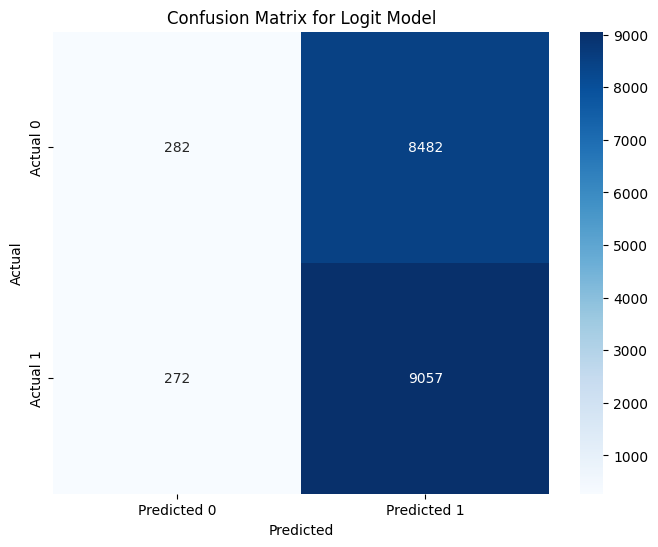

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the probabilities for the test set
X = sm.add_constant(X)
y_pred_prob = logit_model.predict(X)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logit Model')
plt.show()

In [ ]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.516166473221688


In [ ]:
# Categorize 'total_run_impact' into 2 category using quantile

# Calculate quantiles for 'total_run_impact'
quantiles = umpire_1['total_run_impact'].quantile([0.5])

# Categorize 'total_run_impact' based on the median
umpire_1['total_run_impact_category'] = umpire_1['total_run_impact'].apply(lambda x: 1 if x > quantiles[0.5] else 0)

In [ ]:
quantiles

,total_run_impact
0.5,1.41


In [ ]:
umpire_1.head()

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,...,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact,below_expected,total_run_impact_category
0,1,2022-11-05,Lance Barksdale,HOU,PHI,4,1,124.0,4.0,10.0,...,114.0,6.0,96.8,92.0,4.8,97.6,0.09,0.75,0,0
1,2,2022-11-03,Jordan Baker,PHI,HOU,2,3,149.0,6.0,7.4,...,141.6,1.4,96.0,95.0,0.9,97.3,-0.12,0.58,0,0
2,3,2022-11-02,Tripp Gibson,PHI,HOU,0,5,124.0,7.0,7.1,...,116.9,0.1,94.4,94.3,0.1,92.7,-0.10,0.56,0,0
3,4,2022-11-01,Dan Iassogna,PHI,HOU,7,0,140.0,5.0,6.0,...,134.0,1.0,96.4,95.7,0.7,92.9,0.63,0.73,0,0
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129.0,0.0,8.7,...,120.3,8.7,100.0,93.2,6.8,96.1,0.00,0.00,0,0


In [ ]:
# Run a logistic regression using X as 'incorrect_calls' and y as 'total_run_impact_category'

import statsmodels.api as sm

# Define features (X) and target (y)
X = umpire_1['incorrect_calls']
X = sm.add_constant(X)
y = umpire_1['total_run_impact_category']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.390842
         Iterations 7
                               Logit Regression Results                              
Dep. Variable:     total_run_impact_category   No. Observations:                18093
Model:                                 Logit   Df Residuals:                    18091
Method:                                  MLE   Df Model:                            1
Date:                       Mon, 28 Apr 2025   Pseudo R-squ.:                  0.4361
Time:                               23:06:41   Log-Likelihood:                -7071.5
converged:                              True   LL-Null:                       -12541.
Covariance Type:                   nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.7466      0.101    -

In [ ]:
# Add 'below_expected' column to the DataFrame
umpire_1['below_expected'] = umpire_1['correct_calls_above_expected'].apply(lambda x: 1 if x < 0 else 0)

In [ ]:
umpire_1.head()

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,...,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact,below_expected,total_run_impact_category
0,1,2022-11-05,Lance Barksdale,HOU,PHI,4,1,124.0,4.0,10.0,...,114.0,6.0,96.8,92.0,4.8,97.6,0.09,0.75,0,0
1,2,2022-11-03,Jordan Baker,PHI,HOU,2,3,149.0,6.0,7.4,...,141.6,1.4,96.0,95.0,0.9,97.3,-0.12,0.58,0,0
2,3,2022-11-02,Tripp Gibson,PHI,HOU,0,5,124.0,7.0,7.1,...,116.9,0.1,94.4,94.3,0.1,92.7,-0.10,0.56,0,0
3,4,2022-11-01,Dan Iassogna,PHI,HOU,7,0,140.0,5.0,6.0,...,134.0,1.0,96.4,95.7,0.7,92.9,0.63,0.73,0,0
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129.0,0.0,8.7,...,120.3,8.7,100.0,93.2,6.8,96.1,0.00,0.00,0,0


In [ ]:
# Run a logistic regression using X as 'below_expected', 'incorrect_calls' and y as 'total_run_impact_category'

import statsmodels.api as sm

# Define features (X) and target (y)
X = umpire_1[['below_expected', 'incorrect_calls']]
X = sm.add_constant(X)
y = umpire_1['total_run_impact_category']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.390119
         Iterations 7
                               Logit Regression Results                              
Dep. Variable:     total_run_impact_category   No. Observations:                18093
Model:                                 Logit   Df Residuals:                    18090
Method:                                  MLE   Df Model:                            2
Date:                       Mon, 28 Apr 2025   Pseudo R-squ.:                  0.4372
Time:                               23:07:19   Log-Likelihood:                -7058.4
converged:                              True   LL-Null:                       -12541.
Covariance Type:                   nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.8716      0.104    -

In [ ]:
# Create a decision tree using 'incorrect_calls', 'umpire', 'home', 'away' on 'total_run_impact_category'

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Define features (X) and target (y)
features = ['incorrect_calls', 'umpire', 'home', 'away']
X = umpire_1[features]
y = umpire_1['total_run_impact_category']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['umpire', 'home', 'away'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.77689756816507


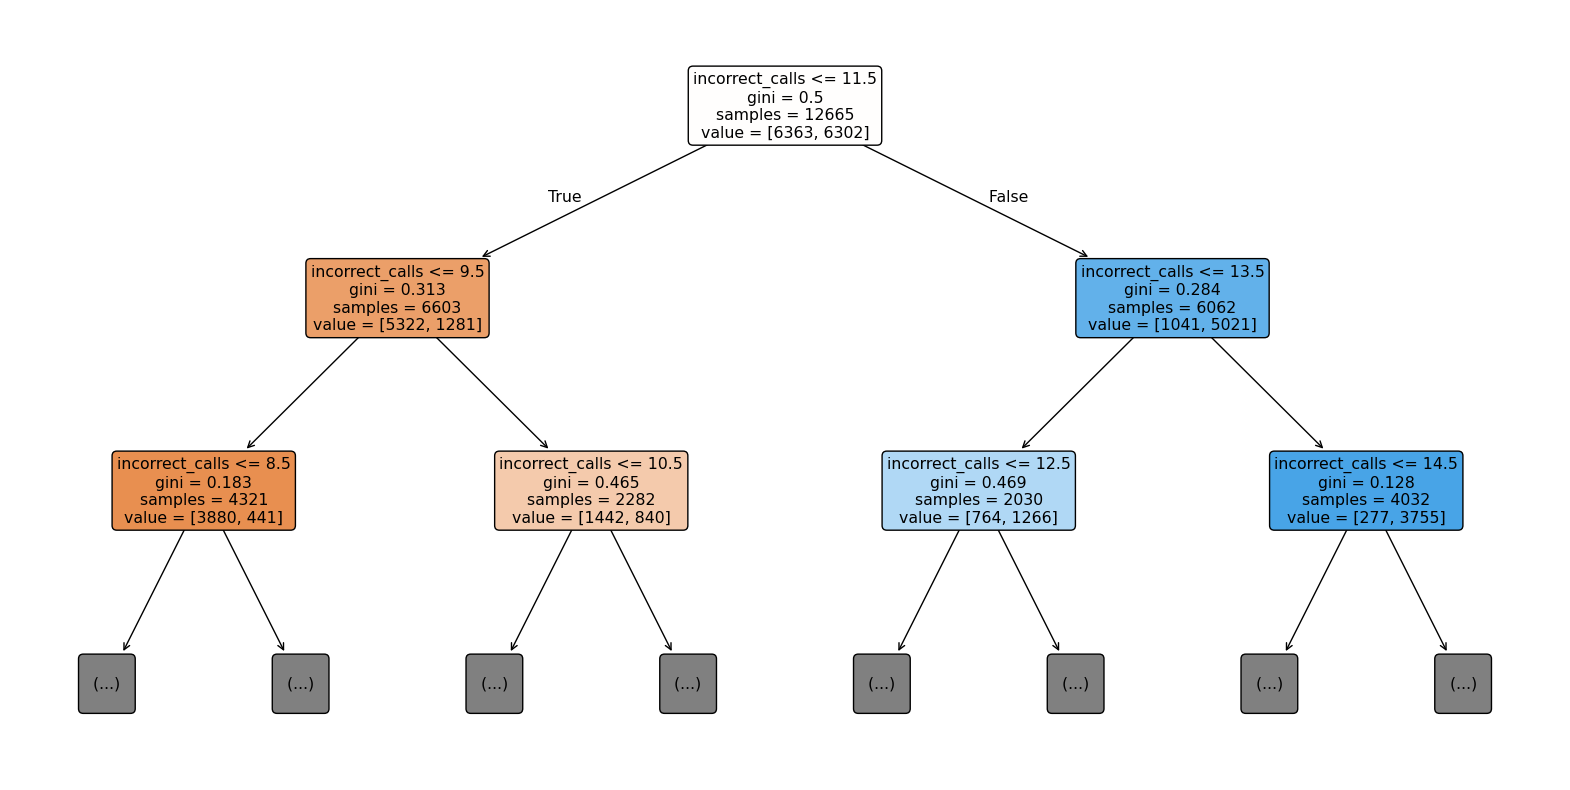

In [ ]:
# Print the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=2, filled=True, rounded=True, feature_names=X.columns)
plt.show()

In [ ]:
grouped_umpire

,umpire,home,incorrect_calls,total_run_impact
0,Adam Beck,ARI,6.000000,0.450000
1,Adam Beck,ATL,8.285714,1.364286
2,Adam Beck,BAL,8.000000,0.815000
3,Adam Beck,BOS,6.500000,0.750000
4,Adam Beck,CHC,11.000000,1.150000
...,...,...,...,...
3316,Will Little,STL,8.636364,1.180909
3317,Will Little,TB,8.000000,0.960000
3318,Will Little,TEX,8.500000,0.993750
3319,Will Little,TOR,8.800000,1.048000


In [ ]:
grouped_umpire_2 = umpire.groupby(['umpire', 'home', 'away'])[['incorrect_calls', 'total_run_impact']].mean().reset_index()

In [ ]:
grouped_umpire_2['total_run_impact_category'] = grouped_umpire_2['total_run_impact'].apply(lambda x: 1 if x > quantiles[0.5] else 0)

In [ ]:
grouped_umpire_2.head()

,umpire,home,away,incorrect_calls,total_run_impact,total_run_impact_category
0,Adam Beck,ARI,LAD,6.0,0.450,0
1,Adam Beck,ATL,ARI,5.0,0.460,0
2,Adam Beck,ATL,BOS,10.5,1.985,1
3,Adam Beck,ATL,MIA,3.0,0.280,0
4,Adam Beck,ATL,NYM,13.0,2.760,1


In [ ]:
# Define features (X) and target (y)
features = ['incorrect_calls','umpire', 'home', 'away']
X = grouped_umpire_2[features]
y = grouped_umpire_2['total_run_impact_category']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['umpire', 'home', 'away'], drop_first=True)

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7738995108937305


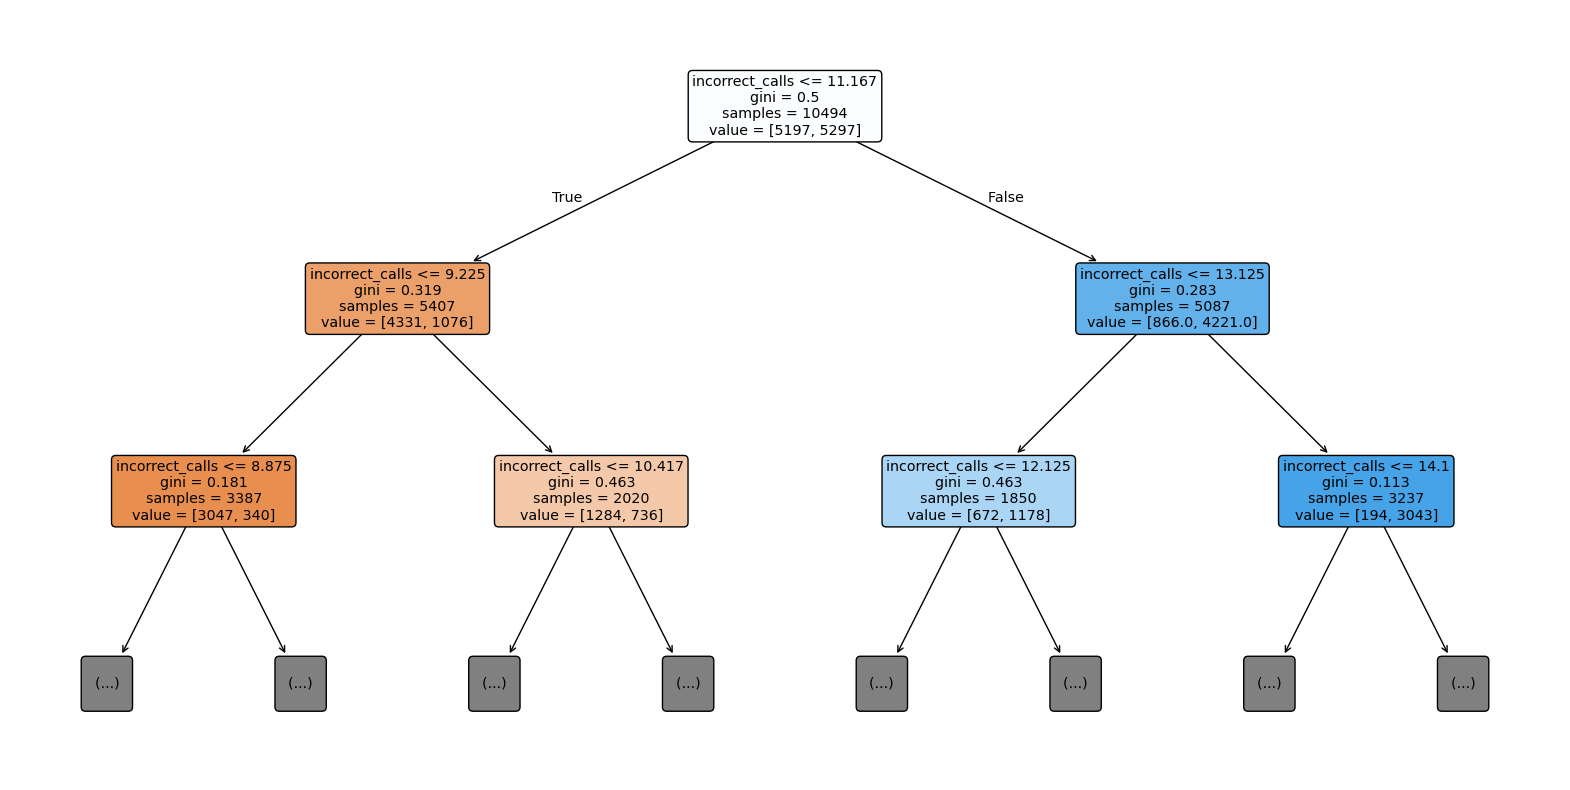

In [ ]:
# Print the first few levels of the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=2, filled=True, rounded=True, feature_names=X.columns)
plt.show()

## **Unsupervised Learning**

### K-Means Clustering


In [ ]:
from sklearn.cluster import KMeans

# Select the relevant columns
df = umpire[['favor_home', 'total_run_impact']].copy()

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Create a 'size' column where Cluster 0 gets bigger circles and others are smaller
df['size'] = df['cluster'].apply(lambda x: 300 if x == 0 else 50)

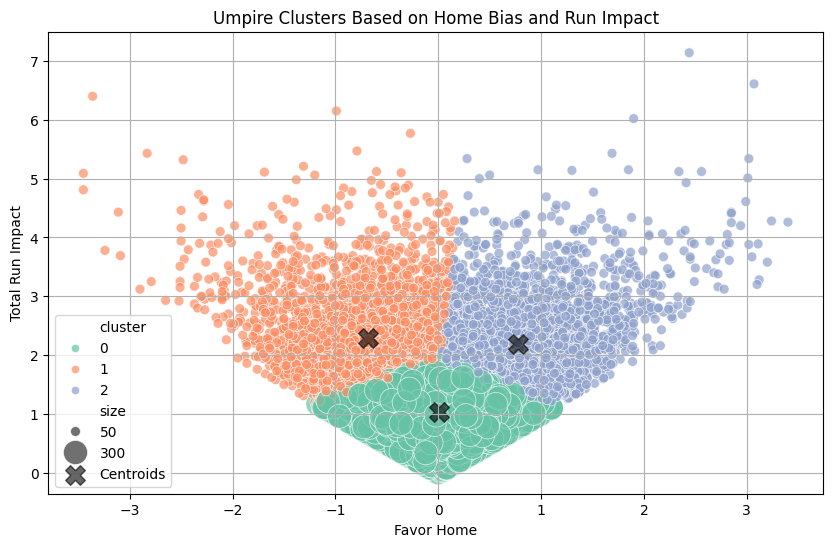

In [ ]:
import seaborn as sns

# Plot the clusters with the centroids for each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='favor_home', y='total_run_impact', hue='cluster', palette='Set2', alpha=0.7, size='size', sizes=(50, 300))

# Plot centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')

# Label the plot
plt.title('Umpire Clusters Based on Home Bias and Run Impact')
plt.xlabel('Favor Home')  # Positive values = home bias
plt.ylabel('Total Run Impact')  # Positive values = increased runs due to umpire calls
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get and print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids (favor_home, total_run_impact):')
for i, center in enumerate(centroids):
    print(f'Cluster {i}: Favor Home = {center[0]:.2f}, Total Run Impact = {center[1]:.2f}') # Check the number of umpires in each cluster
cluster_counts = df['cluster'].value_counts()

# Cluster 0 (Neutral), Cluster 1 (Away team bias), Cluster 2 (Home team bias)
cluster_0_count = cluster_counts[0]
cluster_1_count = cluster_counts[1]
cluster_2_count = cluster_counts[2]

# Output the counts for comparison
print(f'Cluster 0 (Neutral): {cluster_0_count} umpires')
print(f'Cluster 1 (Away team bias): {cluster_1_count} umpires')
print(f'Cluster 2 (Home team bias): {cluster_2_count} umpires')

Cluster centroids (favor_home, total_run_impact):
Cluster 0: Favor Home = 0.01, Total Run Impact = 1.03
Cluster 1: Favor Home = -0.69, Total Run Impact = 2.28
Cluster 2: Favor Home = 0.78, Total Run Impact = 2.19
Cluster 0 (Neutral): 10577 umpires
Cluster 1 (Away team bias): 3617 umpires
Cluster 2 (Home team bias): 3899 umpires


In [ ]:
# Calculate how many more umpires are in Cluster 2 compared to Cluster 1 and Cluster 0
more_cluster_2_than_cluster_1 = cluster_2_count - cluster_1_count
more_cluster_2_than_cluster_0 = cluster_2_count - cluster_0_count

print(f'Cluster 2 has {more_cluster_2_than_cluster_1} more umpires than Cluster 1')
print(f'Cluster 2 has {more_cluster_2_than_cluster_0} more umpires than Cluster 0')

Cluster 2 has 282 more umpires than Cluster 1
Cluster 2 has -6678 more umpires than Cluster 0


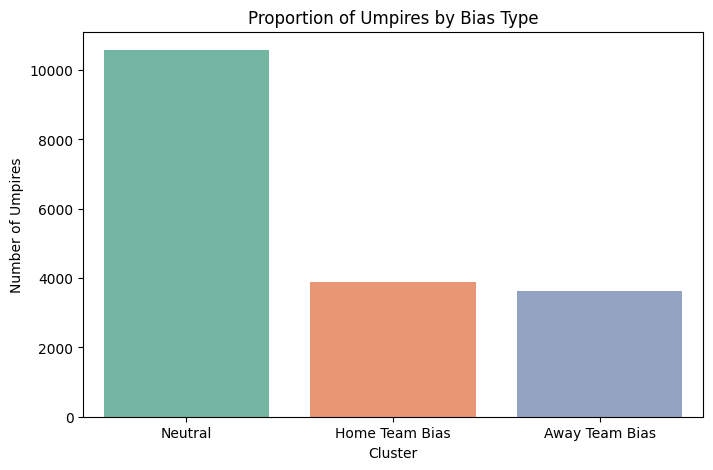


Percentage of Umpires in Each Cluster:
Neutral: 10577 umpires (58.46%)
Home Team Bias: 3899 umpires (21.55%)
Away Team Bias: 3617 umpires (19.99%)
Cluster Sizes (Umpires in each cluster):
cluster_name
Neutral           10577
Home Team Bias     3899
Away Team Bias     3617
Name: count, dtype: int64


In [ ]:
# Calculate the number of umpires in each cluster
cluster_sizes = df['cluster'].value_counts()

# Define cluster names
cluster_names = {0: 'Neutral', 1: 'Away Team Bias', 2: 'Home Team Bias'}

# Map the clusters to their names
df['cluster_name'] = df['cluster'].map(cluster_names)

# Plot the proportions of each cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cluster_name', hue='cluster_name', palette='Set2', order=['Neutral', 'Home Team Bias', 'Away Team Bias'])
plt.title('Proportion of Umpires by Bias Type')
plt.xlabel('Cluster')
plt.ylabel('Number of Umpires')
plt.show()

# Calculate the percentage of each cluster
total_umpires = df.shape[0]
cluster_percentages = cluster_sizes / total_umpires * 100

# Print the percentage of umpires in each cluster
print('\nPercentage of Umpires in Each Cluster:')
for cluster, size in cluster_sizes.items():
    print(f'{cluster_names[cluster]}: {size} umpires ({cluster_percentages[cluster]:.2f}%)')

# Get the counts of each cluster
cluster_sizes_names = df['cluster_name'].value_counts()

# Print the cluster sizes
print(f'Cluster Sizes (Umpires in each cluster):')
print(cluster_sizes_names)

In [ ]:
from scipy.stats import chi2_contingency

# Check if 'cluster_sizes' is a Series and access it using indices
if isinstance(cluster_sizes, pd.Series):
    # Use indices to access values
    observed = [[cluster_sizes[2], cluster_sizes[1]]]
    expected = [[(cluster_sizes[2] + cluster_sizes[1]) / 2, (cluster_sizes[2] + cluster_sizes[1]) / 2]]
else:
    # For DataFrame, use column names
    observed = [[cluster_sizes['Home Team Bias'], cluster_sizes['Away Team Bias']]]
    expected = [[(cluster_sizes['Home Team Bias'] + cluster_sizes['Away Team Bias']) / 2,
                 (cluster_sizes['Home Team Bias'] + cluster_sizes['Away Team Bias']) / 2]]

# Perform chi-squared test
p_value = chi2_contingency([observed[0], expected[0]])[1]
print(f'P-value: {p_value}')
print('Smaller than 0.05 = significant')

P-value: 0.022362264939571504
Smaller than 0.05 = significant


### Hierarchical Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

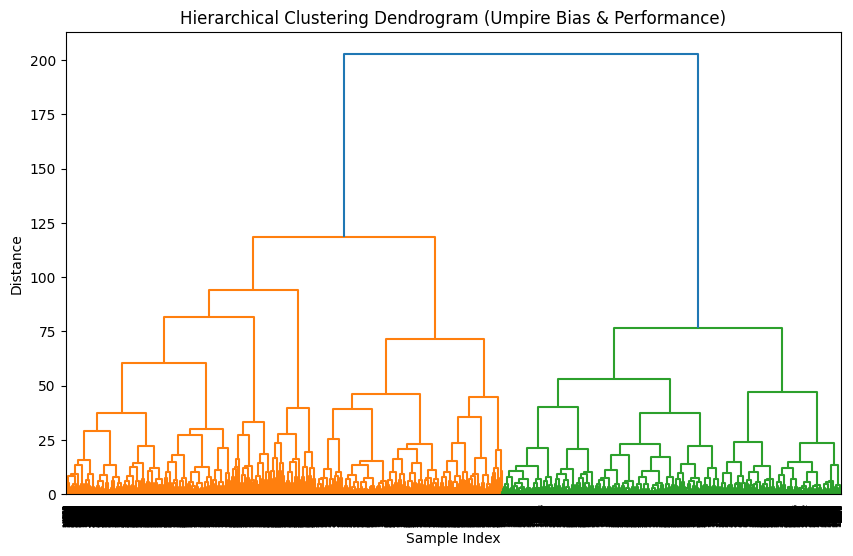

In [ ]:
# Select relevant columns
cluster_data = umpire[['favor_home', 'total_run_impact', 'accuracy', 'consistency']].copy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Umpire Bias & Performance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

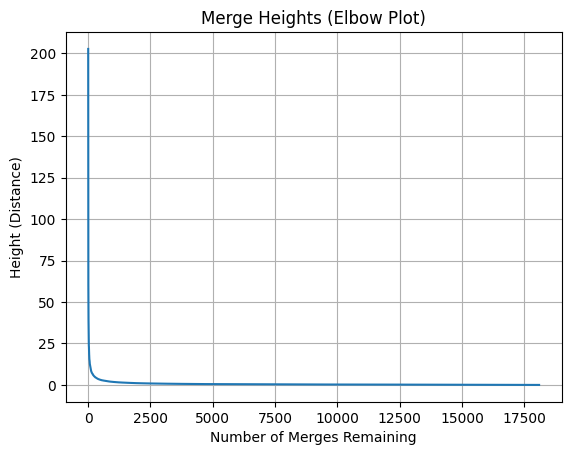

In [ ]:
# Get the heights at each merge
merge_heights = linked[:, 2]  # 3rd column = distance at each merge

# Plot the merge heights
plt.plot(range(1, len(merge_heights) + 1), merge_heights[::-1])
plt.title('Merge Heights (Elbow Plot)')
plt.xlabel('Number of Merges Remaining')
plt.ylabel('Height (Distance)')
plt.grid(True)
plt.show()

The merge heights drop dramatically after the first few merges, then flatten. After that, there's very little distance between clusters.

Therefore, the dataset can be splitted into 2–3 clusters. Beyond 3, any additional clusters are very close together (small differences).

In [ ]:
from scipy.cluster.hierarchy import fcluster

# For 2 clusters
clusters_2 = fcluster(linked, 2, criterion='maxclust')

# For 3 clusters
clusters_3 = fcluster(linked, 3, criterion='maxclust')

Given the dataset of over 18,000 games, 3 clusters seem better to capture importance differences.

In [ ]:
# Add cluster labels back
cluster_data['cluster'] = clusters_3

In [ ]:
cluster_data

,favor_home,total_run_impact,accuracy,consistency,cluster
0,0.09,0.75,96.8,97.6,1
1,-0.12,0.58,96.0,97.3,1
2,-0.10,0.56,94.4,92.7,1
3,0.63,0.73,96.4,92.9,1
4,0.00,0.00,100.0,96.1,1
...,...,...,...,...,...
18208,-0.28,1.42,90.8,93.8,2
18209,0.51,1.97,83.1,91.9,3
18210,-0.40,2.44,88.3,87.2,3
18211,-0.36,0.84,93.9,94.6,1


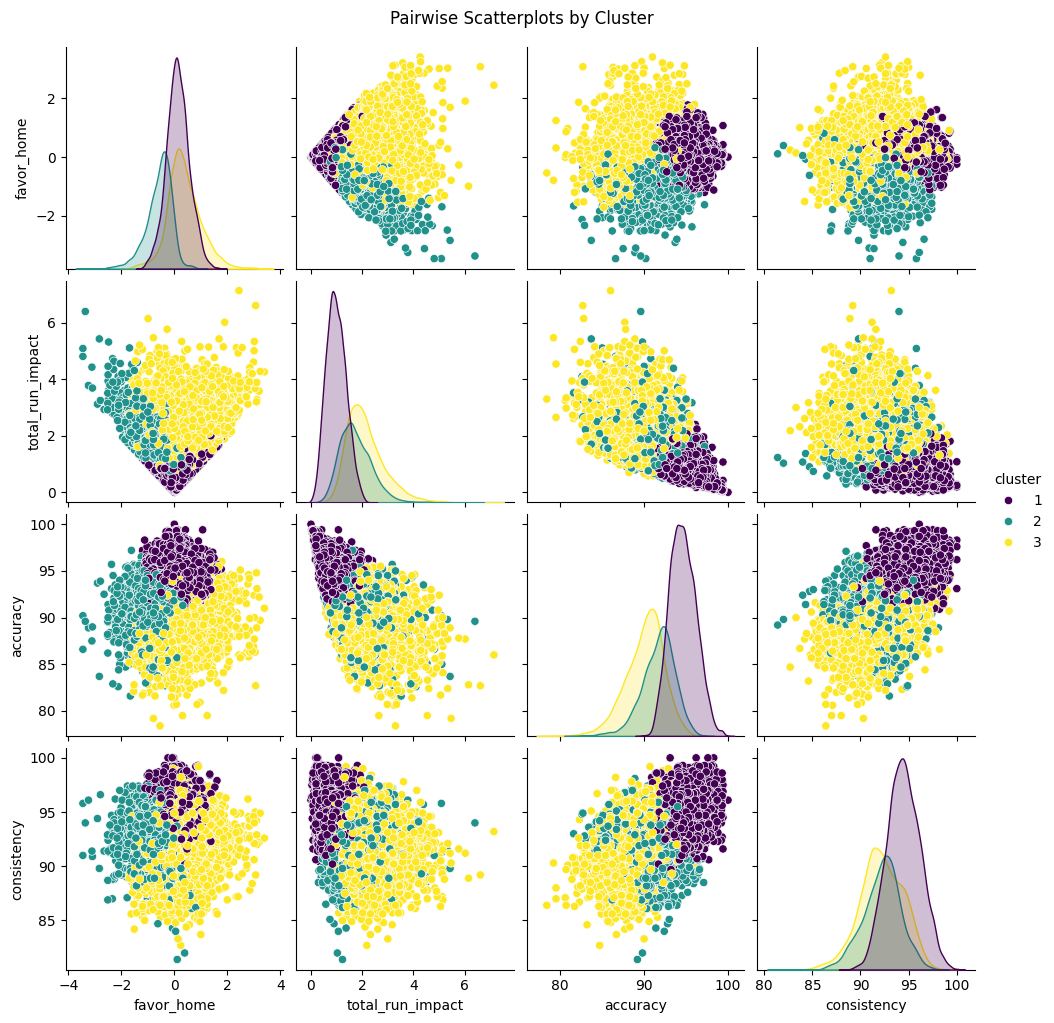

In [ ]:
import seaborn as sns

sns.pairplot(cluster_data, vars=['favor_home', 'total_run_impact', 'accuracy', 'consistency'], hue='cluster', palette='viridis')
plt.suptitle('Pairwise Scatterplots by Cluster', y=1.02)
plt.show()

In [ ]:
# Compute the average for each cluster
cluster_data.groupby('cluster').mean()

,favor_home,total_run_impact,accuracy,consistency
cluster,,,,
1,0.125919,0.976895,94.589246,94.445686
2,-0.582561,1.743164,91.673700,92.192913
3,0.369925,2.126765,90.043539,92.172754
